In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
df = pd.read_excel("/content/data_transform.xlsx")
df.head()

,Price,Sales
0,2.20,68.9
1,7.48,15.6
2,7.26,19.5
3,3.08,35.1
4,8.14,10.4


In [3]:
X = df.iloc[:,0].values
y = df.iloc[:,1].values

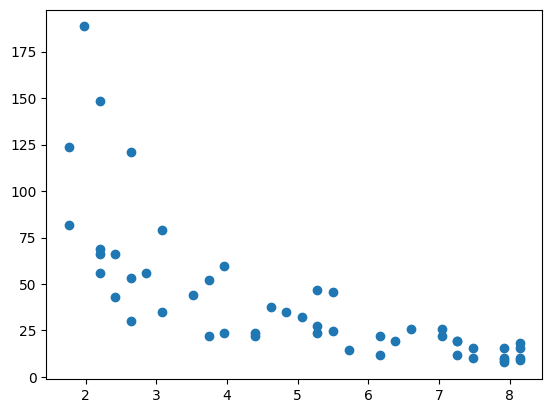

In [4]:
plt.scatter(X,y)
plt.show()

In [5]:
regressor = LinearRegression()
regressor.fit(X.reshape(-1,1),y)

LinearRegression()

#### Q3 and Q4 Answer
**Q3** What is the value of the intercept?

**Q4** What is the value of the slope?

In [6]:
regressor.intercept_ , regressor.coef_

(103.9905130279435, array([-12.53035206]))

#### Q1 Answer

What is the r-square value (round off to two decimals)

In [7]:
y_pred = regressor.predict(X.reshape(-1,1))

r2_score(y,y_pred)

0.526362004567087

### How to Transform?
From the plot above , we can see that the curve of the plot follows the curve of this circle in the bottom-left (3rd quadrant).

So we will be transforming both $x$ and $y$.

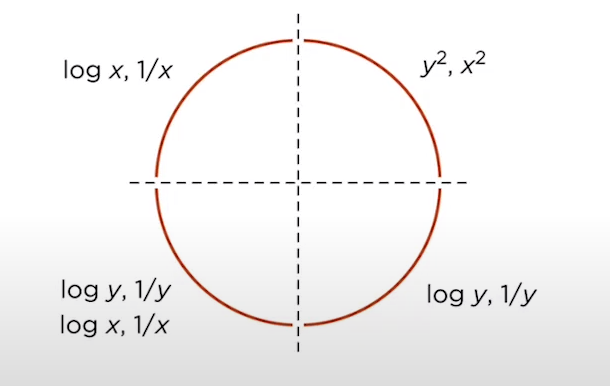


All the `_new` variables refer to the transformed data

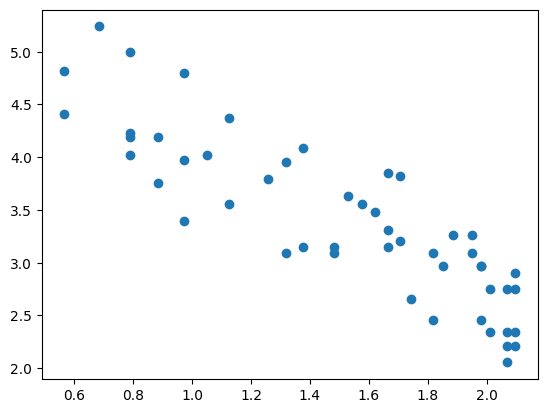

In [9]:
y_new = np.log(y)
X_new = np.log(X)
plt.scatter(X_new,y_new)
plt.show()

#### Q7 and Q8 Answer
**Q7** What is the value of the intercept?

**Q8** What is the value of the slope?

In [19]:
regressor_new = LinearRegression()
regressor_new.fit(X_new.reshape(-1,1) , y_new)

regressor_new.intercept_ , regressor_new.coef_

(5.484836430631702, array([-1.38142938]))

#### Q5 Answer
What is the value of R2 on the transformed dataset

In [11]:
y_new_pred = regressor_new.predict(X_new.reshape(-1,1))

r2_score(y_new,y_new_pred)

0.7600188204501925

All the `<var>2` variables refer to the second half of the questions

### Extra Info (Second Half)
Pandya Motors, a passenger car manufacturer, wants to predict the profit for its cars based on the expenditure spent on areas like safety features, tech features, and marketing. Every car has multiple variants like the base model, middle variant, top model, automatic gearbox, etc. Based on the data provided, build a linear regression model and predict the profit. Use the instructions provided below.

	i. You are provided with two excel files: X.xlsx and y.xlsx, where X is the feature matrix, and y is the target variable.

	ii. Use only Google Collab for doing this assignment as we have created the scoring scheme based on the results obtained from Google Collab.

	iii. Do not do any kind of feature engineering as the data is already feature-engineered and ready to be used for building the regression model.

	iv. Use train_test_split from sklearn.model_selection and keep the test_size = 0.2, random_state = 0

	v. Next, use LinearRegression from sklearn.linear_model and build the regression model

	vi. As usual, fit the model on X_train and y_train
  
	vii. Then predict on X_test


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X2 = pd.read_excel("/content/X.xlsx")
y2 = pd.read_excel("/content/y.xlsx")

In [14]:
X_train , X_test , y_train , y_test = train_test_split(X2 , y2 , test_size=0.2 , random_state = 0)

#### Q10 Answer
What is the value of the intercept?

In [20]:
model_fit = LinearRegression()
model_fit.fit(X_train , y_train)

model_fit.intercept_

array([69744.98712385])

#### Q9 Answer

What is the r² of the model?

In [16]:
y_pred = model_fit.predict(X_test)

r2_score(y_test , y_pred)

0.9347068473282426

#### Q11 Answer

If X1 = 1315.46, X2 = 115816.21, X4 = 297114.46, X5 = 1, X6 = 0, then predict the profit from your linear regression model

> I am taking the line eq to be y = mx + c

In [17]:
# not sure about this
X2_new = [1315.46 , 115816.21 , 297114.46 , 1 , 0]
mx = 0
for i in range(len(model_fit.coef_[0])):
  mx += model_fit.coef_[0][i] * X2_new[i]

mx + model_fit.intercept_

array([84489.1056363])